<!--start-block-->
<hr style="height: 1px;">
<i>This code was authored by the 8.S50x Course Team, Copyright 2021 MIT All Rights Reserved.</i>
<hr style="height: 1px;">
<br>

# LECTURE 5

In this class, we will spend some time further understanding uncertainty in more complicated scenarios. 

<br>
<!--end-block-->

<!--start-block-->
<hr style="height: 1px;">

## 5.0 Overview of Learning Objectives

In this lecture we will explore the following objectives:

- What is the meaning of significance
- What are correlated unceratinies
- How do we interpert the likelihood
- 

<br>
<!--end-block-->

!--start-block-->
<hr style="height: 1px;">

## 5.1 How do we quote significance? 


For the past few lectures, we have been considering uncertainties that we have defined to be the variance of a distribution, but what exactly do they mean. Lets go back to the p-value definition, given a pdf $p\left(x|\theta\right)$
\begin{eqnarray}
P(x|\theta,x\in \Delta) & = &  \int_{x}^{x+\Delta} p\left(x|\theta\right) dx \\
P_{right}(x|\theta, x\leq x_{0}) & = &  \int_{-\infty}^{x} p\left(x|\theta\right) dx
\end{eqnarray}
The bottom integral is the cumulative distribution function(cdf), we can use this to derive relationships to the variances of distributions. Simply put we can compute the probability within various intervals of a distribution.  Since the normal(gaussian) distributions, we typically thing of things in this form
\begin{equation}
\mathcal{N}(0,1) = \frac{x-\bar{x}}{\sigma}
\end{equation}
Lets play around with a few. 

In [3]:
from scipy import stats

#Lets do some integrals
p50=stats.norm.cdf(0)
p1=stats.norm.cdf(1)
p2=stats.norm.cdf(2)
p3=stats.norm.cdf(3)
p5=stats.norm.cdf(5)
pM1=stats.norm.cdf(-1)
pM2=stats.norm.cdf(-2)
pM3=stats.norm.cdf(-3)
pM5=stats.norm.cdf(-5)
#print(p50,p1,p2,p3,pM1,pM2,pM3)

#Whats the probability of things fluctuation more that 1\sigma
print(p1-pM1,"within 1 standard deviations")
print(p2-pM2,"within 2 standard deviations")
print(p3-pM3,"within 3 standard deviations")
print(p5-pM5,"within 5 standard deviations")

#Sometimes we only consider 1-sided p-values
print((1.-p1),"to fluctuate above 1 standard deviation")
print((1.-p3),"to fluctuate above 3 standard deviation")
print((1.-p5),"to fluctuate above 5 standard deviation")

0.6826894921370859 within 1 standard deviations
0.9544997361036416 within 2 standard deviations
0.9973002039367398 within 3 standard deviations
0.9999994266968562 within 5 standard deviations
0.15865525393145707 to fluctuate above 1 standard deviation
0.0013498980316301035 to fluctuate above 3 standard deviation
2.866515719235352e-07 to fluctuate above 5 standard deviation


These probability values define what we call confidence intervals. We often also write these as z-scores namely for a measurement the z-score is the probability that a measurement is within $z$ standard deviations of a distribtuion. 
\begin{equation}
\bar{x}\pm z \sigma
\end{equation}
Z-scores are often synonymously considered in the context of gaussian distribtuions ie a z-score is one standard deviation in either direction, and the deviation is symmetric. However there is no gaurantee that this needs to be the case. 

## 5.2 Asymmetric distributions

Now above we considered the simplest scenario where we looked at the variation of distributions, which we assumed were symmetrically distributed about zero. What if these distributions are asymmetric, how do we define the variations, lets take a look at some asymmetric distributions. 

two tail values: 19.02276779864163 2.7003894999803584
one tail values: 16.918977604620448 3.3251128430668158


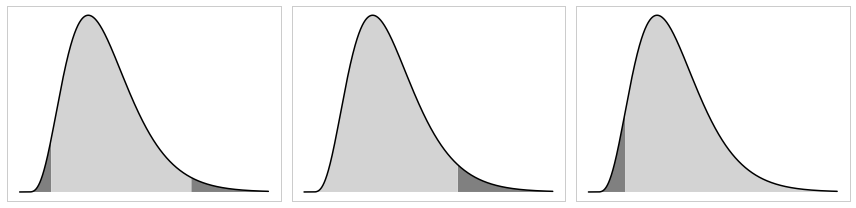

In [12]:
import numpy as np
import matplotlib.pyplot as plt
#code stolen from here: https://aegis4048.github.io/comprehensive_confidence_intervals_for_python_developers
#Note this needs to be python3

#Lets plot a chi2 with 9 degrees of freedom (df)
df = 9 
x = np.linspace(-1, 28, 1000)
y = stats.chi2.pdf(x, df, loc=0, scale=1)

# two-tailed
#Note we will use this function percent point function(ppf), which inverts the cdf 
two_right_tail = stats.chi2.ppf(1 - 0.025, df) #left value
two_left_tail  = stats.chi2.ppf(1 - 0.975, df) #right value
print("two tail values:",two_right_tail,two_left_tail)

# one tailed
one_right_tail = stats.chi2.ppf(1 - 0.05, df)
one_left_tail  = stats.chi2.ppf(1 - 0.95, df)
print("one tail values:",one_right_tail,one_left_tail)

plt.style.use('seaborn-whitegrid')
fig, axes = plt.subplots(1, 3, figsize=(12, 3))

for ax in axes:
    ax.plot(x, y, c='black')
    ax.grid(False)
    ax.xaxis.set_major_formatter(plt.NullFormatter())
    ax.yaxis.set_major_formatter(plt.NullFormatter())

#now lets fill this from the left
axes[0].fill_between(x, 0, y, where=(np.array(x) > min(x)) & (np.array(x) <= two_left_tail), facecolor='grey')
axes[0].fill_between(x, 0, y, where=(np.array(x) > two_left_tail) & (np.array(x) < two_right_tail), facecolor='lightgrey')
axes[0].fill_between(x, 0, y, where=(np.array(x) > two_right_tail) & (np.array(x) <= max(x)), facecolor='grey')

axes[1].fill_between(x, 0, y, where=(np.array(x) > min(x)) & (np.array(x) < one_right_tail), facecolor='lightgrey')
axes[1].fill_between(x, 0, y, where=(np.array(x) > one_right_tail) & (np.array(x) <= max(x)), facecolor='grey')

axes[2].fill_between(x, 0, y, where=(np.array(x) > min(x)) & (np.array(x) <= one_left_tail), facecolor='grey')
axes[2].fill_between(x, 0, y, where=(np.array(x) > one_left_tail) & (np.array(x) <= max(x)), facecolor='lightgrey')

fig.tight_layout()


Now that we have taken a look a these distributions, we see a clear asymmetry in the p-values of the left and right. What is conserved is the integrals, but the values are different. Lets go ahead and compute the mean and variance of these distributions. to do this, we will sample a distribution using some new functions, this rvs. 

[ 8.90842802  8.76661767  9.35803237 10.72982349 23.8134117 ]
9.58969628544277 4.469890858910997


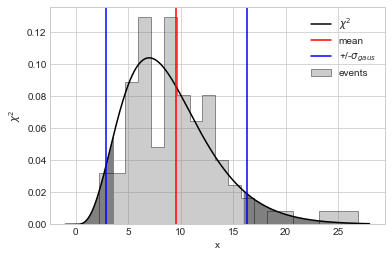

In [22]:
#Lets compute the mean and RMS of a sample from this distribution
df=9
y_chi2 = stats.chi2.rvs(size=100,df=df)
print(y_chi2[0:5])
print(y_chi2.mean(),y_chi2.std())
z=1.5
x = np.linspace(-1, 28, 1000)
y = stats.chi2.pdf(x, df, loc=0, scale=1)
two_right_tail = stats.chi2.ppf(1 - stats.norm.cdf(-z), df)
two_left_tail = stats.chi2.ppf(1 - stats.norm.cdf(z), df)

#Now lets plot the filled area using the true pdfs and the assumed variations if it were a gaussian
plt.style.use('seaborn-whitegrid')
#plot distribution
plt.plot(x, y, c='black',label="$\chi^2$")
#plot chi2
plt.hist(y_chi2, histtype='stepfilled', edgecolor='k', alpha=0.4, color='gray', density=True,bins=20,label="events")
#true values
plt.fill_between(x, 0, y, where=(np.array(x) > min(x)) & (np.array(x) <= two_left_tail), facecolor='grey')
plt.fill_between(x, 0, y, where=(np.array(x) > two_right_tail) & (np.array(x) <= max(x)), facecolor='grey')
#Mean +/- 1 sigma
plt.axvline(y_chi2.mean(), c='red',label="mean")
plt.axvline(y_chi2.mean()+y_chi2.std()*z, c='blue',label="+/-$\sigma_{gaus}$")
plt.axvline(y_chi2.mean()-y_chi2.std()*z, c='blue')
plt.xlabel("x")
plt.ylabel("$\chi^{2}$")
plt.legend(loc='upper right')
plt.show()

#### Challenge Question

Lets consider a Cauchy distribution presented [here](https://en.wikipedia.org/wiki/Cauchy_distribution) and given by the form
\begin{equation}
f(x;x_{0},\gamma) = \frac{1}{\pi \gamma} \left(\frac{1}{\left(x-x_0\right)^{2} + \gamma^{2}}\right)
\end{equation}
avaible also in scipy stats with ```scipy.stats.cauchy```. For this function compare the gaussian 1 standard deviation with the true Cauchy p-value

1.2181885658223912 92.6788812000688


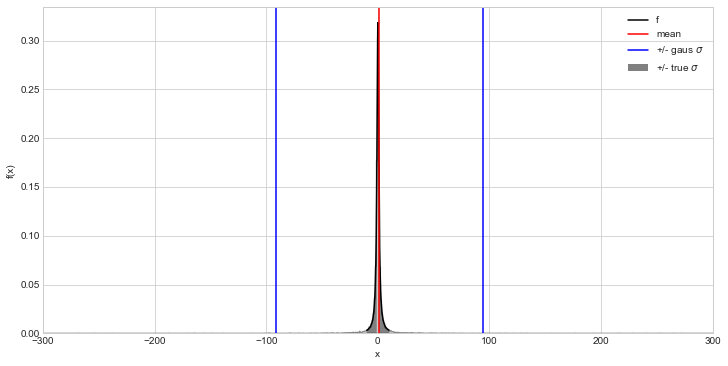

In [34]:
#Lets try this with an even crazier distribution
fig, ax = plt.subplots(figsize=(12, 6))
plt.xlim([-300,300])
y_cauchy = stats.cauchy.rvs(size=10000)
print(y_cauchy.mean(),y_cauchy.std())

#choose 1-sigma z-score
z=1.0
x = np.linspace(-10, 10, 1000)
y = stats.cauchy.pdf(x, loc=0, scale=1)
two_right_tail = stats.cauchy.ppf(1 - stats.cauchy.cdf(-z))
two_left_tail = stats.cauchy.ppf(1 - stats.cauchy.cdf(z))

#plot distribution
plt.plot(x, y, c='black',label="f")
plt.hist(y_cauchy, histtype='stepfilled', edgecolor='k', alpha=0.4, color='gray', density=True,bins=10000)
#plot true-sigma
plt.fill_between(x, 0, y, where=(np.array(x) > min(x)) & (np.array(x) <= two_left_tail), facecolor='grey',label='+/- true $\sigma$')
plt.fill_between(x, 0, y, where=(np.array(x) > two_right_tail) & (np.array(x) <= max(x)), facecolor='grey')
plt.axvline(y_cauchy.mean(), c='red',label="mean")
plt.axvline(y_cauchy.mean()+y_cauchy.std()*z, c='blue',label='+/- gaus $\sigma$')
plt.axvline(y_cauchy.mean()-y_cauchy.std()*z, c='blue')
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend(loc='upper right')
plt.show()

### 5.3 Moments of distributions

So you see that with certain types of distribtuions things can deviate wildly from what is expected. Namely in the case of a cauchy or asymmetric distribtuion, the standard deviation of a data sample is not a reflection of the p-value of the distribtuion at all. To describe this distribtuion there are a number of ways to mitigate this issue. The first is to introduce higher order moments of a pdf. 

Lets assume our distributions are centered about zero (we can always re center them. The we can write moments as
\begin{equation}
 \mu_{n}=m^{n}(x)=E[x^{n}p(x)] = \int_{-\infty}^{\infty} x^{n} p(x) dx
\end{equation}

The mean  $E[p(x)]=m^{1}(x)$, the variance of the distribtuion is just $V[p(x)]=m^{2}(x)$. These you should know and love by now, but we can keep going in moments to get more distribtuions. The next moment is skewness, this tells you how asymmetric a distribtuion is. Skew$=m^{3}(x)$, and going further we have the Kurtosis$=m^{4}(x)$ this tells you how important the tails of a distribution are. 

There are lots of distribtuions in data. Here is a "story book of distributions":
http://bois.caltech.edu/dist_stories/t3b_probability_stories.html#Cauchy-distribution

Lets take a look at the moments of our two example distribtuions above. 

In [35]:
def raw_moment(X, k, c=0):
    return ((X - c)**k).mean()

def central_moment(X, k):
    if k == 1:
        return X.mean()
    return raw_moment(X=X, k=k, c=X.mean())

def print_moments(X,label):
    print(label+" mean:",central_moment(X,1))
    print(label+" var:" ,central_moment(X,2))
    print(label+" skew:",central_moment(X,3))
    print(label+" kurtosis:",central_moment(X,4))

N=100000
y_norm = stats.norm.rvs(size=N)
print_moments(y_norm,"normal")

df=10
y_chi2 = stats.chi2.rvs(size=N,df=df)
print_moments(y_chi2,"chi2 df "+str(df))

y_cauchy = stats.cauchy.rvs(size=N)
print_moments(y_cauchy,"cauchy")


normal mean: -0.003457808220825242
normal var: 1.0043518366507511
normal skew: 0.015238049868172985
normal kurtosis: 3.0399300096166715
chi2 df 10 mean: 10.020583544008582
chi2 df 10 var: 20.17088998893292
chi2 df 10 skew: 82.01504735953031
chi2 df 10 kurtosis: 1725.624527984837
cauchy mean: 2.379151075016985
cauchy var: 569437.833450664
cauchy skew: 131076901727.9903
cauchy kurtosis: 3.0964448052021388e+16


Now, the nice thing about moments is that you can use these values to map any distribtuion to any other distribution. 
I am not really doing justice to the above, but moments are in fact incredibly useful. A chunk of my PhD thesis is dedicated to using moments of a Gaussian (cumulants) to model distributions with a small amount of data. 

In light of this, what we can imagine doing, like a fourier transform, you can tranform one distribution into another through the use of the CDFs. The strategy here is to match quantiles with each other, such that you have for a transform from $x\rightarrow x^{\prime}:

\begin{equation}
\int_{-\infty}^{x} p_1(x) dx = \int_{-\infty}^{x^\prime} p_2(x^{\prime}) dx^{\prime}
\end{equation}

To do this mapping there are many different approaches, one such approach of mapping distributions is the [box-cox method](https://en.wikipedia.org/wiki/Power_transform), which aimes to use the moments to transform distributions into Gaussians.


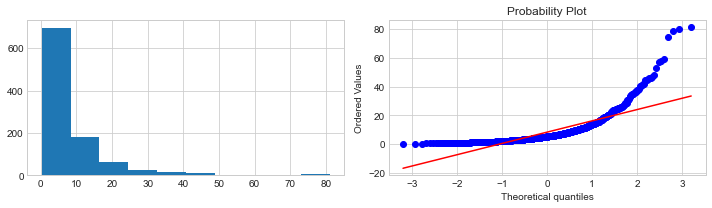

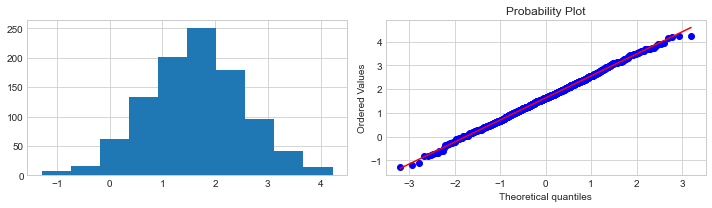

In [43]:
x = stats.lognorm.rvs(s=1, loc=0, scale=5, size=1000, random_state=4)

# plot
fig, axes = plt.subplots(1, 2, figsize=(10, 3))
axes[0].hist(x)
stats.probplot(x, dist=stats.norm, plot=axes[1])
fig.tight_layout()

# box-cox transform
xt, lmbda = stats.boxcox(x)

# plot
fig, axes = plt.subplots(1, 2, figsize=(10, 3))
axes[0].hist(xt)
stats.probplot(xt, dist=stats.norm, plot=axes[1])
fig.tight_layout()

These types of transforms are particularly useful when are trying to match a simulated distribution with a data distribution. If both the simulated and true distributions are trying to describe the same thing, you can use a transform like this to map one distribution onto another. 

### Challenge Question
Take the absolute value of a cauchy distribution and map it onto a gaussian? Approximately, Where is zero?

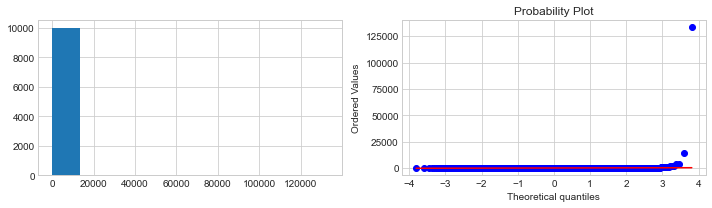

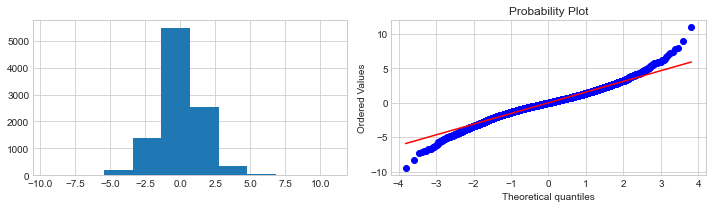

In [59]:
x = np.abs(stats.cauchy.rvs(size=10000))

# plot
fig, axes = plt.subplots(1, 2, figsize=(10, 3))
axes[0].hist(x)
stats.probplot(x, dist=stats.norm, plot=axes[1])
fig.tight_layout()

# box-cox transform
xt, lmbda = stats.boxcox(x)

# plot
fig, axes = plt.subplots(1, 2, figsize=(10, 3))
axes[0].hist(xt)
stats.probplot(xt, dist=stats.norm, plot=axes[1])
fig.tight_layout()

#zero will be the farthest to the left, which depends on your sample size. 

## 5.4 Numerical Integration
You have probably noticed that I didn't bother to compute integrals to get the moments. Instead I did what is referred to as Monte-Carlo Integration (or more generally bootstrapping) where I just sampled a distribution and integrated by sampling. Namely 
\begin{equation}
E[x^{n}p(x)] = \int_{-\infty}^{\infty} x^{n} p(x) dx = \sum_{i=1}^{N} x_{i}^{n}
\end{equation}
Where here the $x_{i}\in p(x)$ are sampled from the probability distribution function. So what happens, when we have a distribution, but we don't know the analytic form. How can we sample it?  

There are a lot of ways to do this, perhaps the best well known is markov chain monte carlo. However the simplest is to just turn our distribution into a 2D image and random sample points on the image. Instead of writing the points out lets just do it. 

First lets integrate a quarter circle, we know that the integral is given by $A=\frac{\pi}{4}$.


Pi (4*area): 3.128 +/- 0.09891604521006692


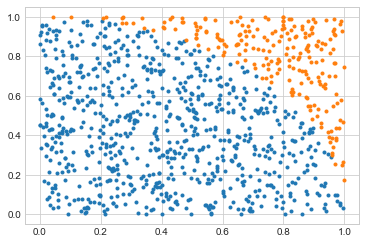

In [62]:
import math

#First lets just compute the area of a quarter circle with radius 1
def quarterarea(iN):
    area=0
    lXin = np.array([])
    lYin = np.array([])
    lXout = np.array([])
    lYout = np.array([])
    for i0 in range(iN):
        #Sample X and Y
        pX = np.random.uniform(0,1)
        pY = np.random.uniform(0,1)
        #Check if its in 1
        if math.sqrt(pX**2+pY**2) < 1:
            lXin = np.append(lXin,pX)
            lYin = np.append(lYin,pY)
            area += 1
        else:
            lXout = np.append(lXout,pX)
            lYout = np.append(lYout,pY)
    return (float(area)/float(iN)),lXin,lYin,lXout,lYout

#sample points
lN=1000
a,lXin,lYin,lXout,lYout=quarterarea(lN)
print("Pi (4*area):",a*4,"+/-",4*a/math.sqrt(lN)) #gotta put an uncertainty
plt.plot(lXin,lYin,marker='.',linestyle = 'None')
plt.plot(lXout,lYout,marker='.',linestyle = 'None')
plt.show()

The idea with Monte Carlo integration is that we calculate an integral by evaluating the function. We don't actually have to compute the integral. This avoids what is potentially a very complicated step. 

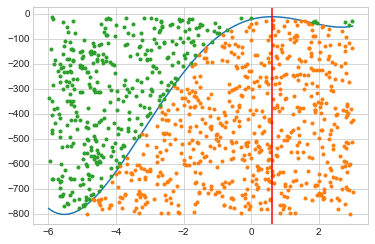

In [64]:
from scipy import optimize as opt 

#Now lets consider integrating some random function
def f(x):
    return x**4 + 3*(x-2)**3 - 15*(x)**2 + 1

def fneg(x):
    return -1*(x**4 + 3*(x-2)**3 - 15*(x)**2 + 1)

#First thing is to define a range in x
xmin=-6
xmax=3
x = np.linspace(xmin, xmax, 100)

#Now we need to find a range in y
sol=opt.minimize_scalar(f,bounds=(xmin, xmax), method='Brent')
ymin=sol.fun
#y-max is to get the minimum of negative f
sol=opt.minimize_scalar(fneg,bounds=(xmin, xmax), method='Brent')
ymax=-1*sol.fun

#now, lets sample a 2D grid y-min and y-max and compute the integral
lXin = np.array([])
lYin = np.array([])
lXout = np.array([])
lYout = np.array([])
for i0 in range(lN):
    pX = abs(xmax-xmin)*np.random.uniform(0,1)+xmin
    pY = abs(ymax-ymin)*np.random.uniform(0,1)+ymin
    pYMin = f(pX)
    if pY < pYMin:
        lXin = np.append(lXin,pX)
        lYin = np.append(lYin,pY)
    else:
        lXout = np.append(lXout,pX)
        lYout = np.append(lYout,pY)

plt.plot(x, f(x));
plt.plot(lXin,lYin,marker='.',linestyle = 'None')
plt.plot(lXout,lYout,marker='.',linestyle = 'None')
plt.axvline(sol.x, c='red')
plt.show()

From the above scenario, we can see that the orange points are below the line from roughly -800 to 0, and the green points are above the line. We can make a histogram of this.

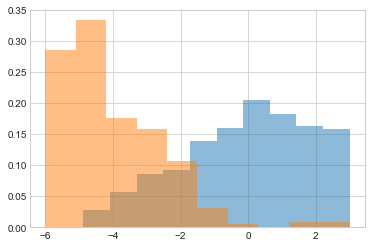

Integral above: 633 Integral below: 367


In [67]:
plt.hist(lXin,alpha=0.5,density=True)
plt.hist(lXout,alpha=0.5,density=True)
plt.show()

print("Integral above:",len(lXin),"Integral below:",len(lXout))

This procedure is known as "Area-based" sampling, and is considered a method of Monte-Carlo Integration. Monte-Carlo integration is a rich field. All High energy physics simulations are based on it. Basically our function we sample from starts with the a collision and computing the probability that this could be any other collision. We then proceed to put this single collision through a point by point simulation, of each particle going through all the detectors. Finally we aggregate our distributions based on this. You will see the usefulness of Monte Carlo Simulation next week. 

There is a lot more you can do see [here](https://colab.research.google.com/drive/1nU4E_pFWjSFPNigzy8-LcJpef26IKY6x?usp=sharing)

Ok, so I have just dumped a whole toolkit of statistical tools on you after we did our original fit to the expansion of the universe. Lets go back and analyze our fit again and see if we can make some conclusions. Recall that we started the previous lecture by looking at the fit residuals. Lets now do this. However, now lets divide by the uncertainty in each measured point, to see how well our fit is behaving. 


## 5.5 A more sophisticated fit

Now that we have gone on an excursion to understand properties of fits, lets go ahead an analyze our supernovae data, and try to pull in all of the info that we can. Lets first look at our linear fit.  One sec, while we load it all. 


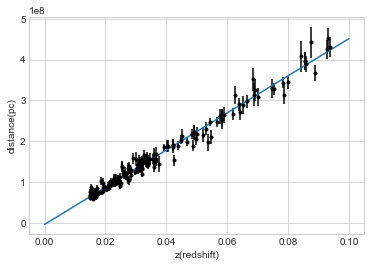

In [77]:
import csv
#Lets try to understand how good the fits we made in last class are, lets load the supernova data again
label='sn_z_mu_dmu_plow_union2.1.txt'
def distanceconv(iMu):
    power=iMu/5+1
    return 10**power

def distanceconverr(iMu,iMuErr):
    power=iMu/5+1
    const=math.log(10)/5.
    return const*(10**power)*iMuErr

def load(iLabel,iMaxZ=0.1):
    redshift=np.array([])
    distance=np.array([])
    distance_err=np.array([])
    with open(iLabel,'r') as csvfile:
        plots = csv.reader(csvfile, delimiter='\t')
        for row in plots:
            if float(row[1]) > iMaxZ:
                continue
            redshift = np.append(redshift,float(row[1]))
            distance = np.append(distance,distanceconv(float(row[2])))
            distance_err = np.append(distance_err,distanceconverr(float(row[2]),float(row[3])))
    return redshift,distance,distance_err  
        
#Now lets run the regression again
#Lets run the regression again
def variance(isamples):
    mean=isamples.mean()
    n=len(isamples)
    tot=0
    for pVal in isamples:
        tot+=(pVal-mean)**2
    return tot/n

def covariance(ixs,iys):
    meanx=ixs.mean()
    meany=iys.mean()
    n=len(ixs)
    tot=0
    for i0 in range(len(ixs)):
        tot+=(ixs[i0]-meanx)*(iys[i0]-meany)
    return tot/n

def linear(ix,ia,ib):
    return ia*ix+ib

redshift,distance,distance_err=load(label)
var=variance(redshift)
cov=covariance(redshift,distance)
A=cov/var
const=distance.mean()-A*redshift.mean()
xvals = np.linspace(0,0.1,100)
yvals = []
for pX in xvals:
    yvals.append(linear(pX,A,const))

plt.plot(xvals,yvals)
plt.errorbar(redshift,distance,yerr=distance_err,marker='.',linestyle = 'None', color = 'black')
plt.xlabel("z(redshift)")
plt.ylabel("distance(pc)")
plt.show()

Now that we have loaded, lets actually look at the residuals. 

residuals mean: 0.0674380962700456
residuals var: 0.9619236126333892
residuals skew: 0.1553936844426706
residuals kurtosis: 3.274051707095445
normal distribution mean: -0.00738873031702807
normal distribution var: 0.9680051594458036
normal distribution skew: 0.0781902655077403
normal distribution kurtosis: 2.8751142115229267


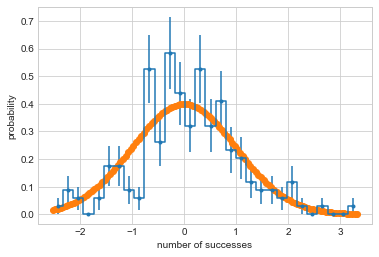

In [78]:
def residualsComp(redshift,distance,distance_err):
    residuals=np.array([])
    for i0 in range(len(redshift)):
        pResid=linear(redshift[i0],A,const)-distance[i0]
        residuals = np.append(residuals,pResid/distance_err[i0])

    y0, bin_edges = np.histogram(residuals, bins=30)
    bin_centers = 0.5*(bin_edges[1:] + bin_edges[:-1])
    norm0=len(residuals)*(bin_edges[-1]-bin_edges[0])/30.
    plt.errorbar(bin_centers,y0/norm0,yerr=y0**0.5/norm0,marker='.',drawstyle = 'steps-mid')
    k=np.arange(bin_edges[0],bin_edges[-1],0.05)
    normal=stats.norm.pdf(k,0,1)
    normalpoints=stats.norm.rvs(0,1,1000)
    #First lets look at the moments 
    print_moments(residuals,"residuals")
    print_moments(normalpoints,"normal distribution")

    #Now lets plot it
    plt.plot(k,normal,'o-')
    plt.xlabel("number of successes")
    plt.ylabel("probability")
    plt.show()
    return residuals
residuals=residualsComp(redshift,distance,distance_err)

What we see is that the mean of the resiudals is very lose to 0 with a variance of 1, and a skew and kurtosis really close to a normal distribtuion. This looks likes our residuals are gaussian. What do you think that means for our fit? 

Lets check it out. 


Total chi2: 169.1325141558355 NDOF 173
Normalized chi2: 0.977644590496159
Probability of chi2: 0.5688982622097782


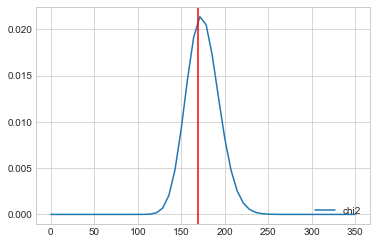

In [73]:
#now lets look at the chi2
chi2=np.sum(residuals**2)
print("Total chi2:",chi2,"NDOF",len(residuals)-2)
print("Normalized chi2:",chi2/(len(residuals)-2))
print("Probability of chi2:",1-stats.chi2.cdf(chi2,(len(residuals)-2)))

#Lets plot it for good measure too
x = np.linspace(0,len(residuals)*2)
chi2d=stats.chi2.pdf(x,len(residuals-2)) # 40 bins
plt.plot(x,chi2d,label='chi2')
plt.axvline(chi2, c='red')
plt.legend(loc='lower right')

We see that the $\chi^{2}$ value is very close to the number of degrees of freedom, with a normalized $\chi^{2}/NDF \approx1$, that is a legitimately good fit! Lets loosen the data have you try. 

### Challenge Question

Repeat the linear fit above now without a cut on the redshift? What happens? 

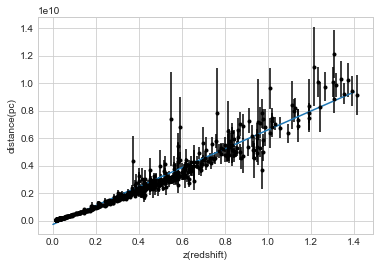

residuals mean: -5.4690139399836575
residuals var: 134.2507160558813
residuals skew: -2673.0893464472424
residuals kurtosis: 92943.88421254256
normal distribution mean: -0.05937319520943785
normal distribution var: 0.9909930285283236
normal distribution skew: -0.021327955950611707
normal distribution kurtosis: 2.72879736426162


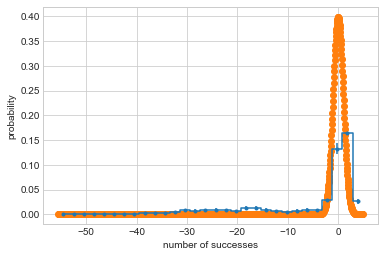

Total chi2: 95213.28112833778 NDOF 578
Normalized chi2: 164.72886008362937
Probability of chi2: 0.0


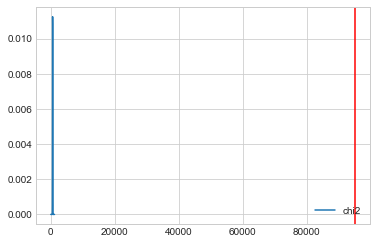

In [80]:
#solution

redshift,distance,distance_err=load(label,10000)
var=variance(redshift)
cov=covariance(redshift,distance)
A=cov/var
const=distance.mean()-A*redshift.mean()
xvals = np.linspace(0,1.4,100)
yvals = []
for pX in xvals:
    yvals.append(linear(pX,A,const))

plt.plot(xvals,yvals)
plt.errorbar(redshift,distance,yerr=distance_err,marker='.',linestyle = 'None', color = 'black')
plt.xlabel("z(redshift)")
plt.ylabel("distance(pc)")
plt.show()

residuals=residualsComp(redshift,distance,distance_err)
#now lets look at the chi2
chi2=np.sum(residuals**2)
print("Total chi2:",chi2,"NDOF",len(residuals)-2)
print("Normalized chi2:",chi2/(len(residuals)-2))
print("Probability of chi2:",1-stats.chi2.cdf(chi2,(len(residuals)-2)))

#Lets plot it for good measure too
x = np.linspace(0,len(residuals)*2)
chi2d=stats.chi2.pdf(x,len(residuals-2)) # 40 bins
plt.plot(x,chi2d,label='chi2')
plt.axvline(chi2, c='red')
plt.legend(loc='lower right')

This is what we technically call a "Shit Fit". We knew this already, but now we have put a barrage of statistical tools that confirmed our chi-by-Eye  assesment. 

### 5.6 The properties of the universe

Now Lets go and run our fit function that included the parameters of the universe. Last time we did this with lmfit. This time, we are just going to do it with scipy optimize, and we will go step-by-step through the fit and what it is doing. 

for the fit function, recall that we would like to fit the actual equation for the evolution fo the universe. 



In [81]:
#We are not going to plot the fit first, lets just use our barrage of statistics to check if its ok
def hubble(z,Om):
    pVal=Om*(1+z)**3+(1.-Om)
    return np.sqrt(pVal)

def lumidistance(x,h0,Om):
    integral=0
    nint=100
    for i0 in range(nint):
        pVal=1./(1e-5+hubble(x*float(i0)/100.,Om))
        integral += pVal*x/float(nint)
    d=(1.+x)*integral*(1e6*3e5/h0)
    return d

def loglike(x):
    lTot=0
    for i0 in range(len(redshift)):
        xtest=lumidistance(redshift[i0],x[0],x[1])
        #lTot = lTot+(distance[i0]-xtest)**2
        lTot = lTot+((1./distance_err[i0])**2)*(distance[i0]-xtest)**2
    return lTot #*0.5 The above is 2 times loglike

def residuals(x):
    residuals=np.array([])
    for i0 in range(len(redshift)):
        pResid=lumidistance(redshift[i0],sol.x[0],sol.x[1])-distance[i0]
        residuals = np.append(residuals,pResid/distance_err[i0])
    return residuals


Ok, so this time we are going to minimize loglikelihood, lets minimize the fit.

In [82]:
x0 = np.array([60.,0.2])
ps = [x0]
bnds = ((0, 1000), (0, 1.0))
sol=opt.minimize(loglike, x0,bounds=bnds, tol=1e-6)
print(sol)
residuals=residuals(sol.x)
print_moments(residuals,"residuals")
chi2=np.sum(residuals**2)
print("Total chi2:",chi2,"NDOF",len(residuals)-2)
print("Normalized chi2:",chi2/(len(residuals)-2))
print("Probability of chi2:",1-stats.chi2.cdf(chi2,(len(residuals)-2)))

      fun: 539.9052666576513
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([-0.00060254, -0.00754881])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 39
      nit: 7
   status: 0
  success: True
        x: array([70.42271422,  0.30137182])
residuals mean: -0.09679285130407232
residuals var: 0.9215022933461722
residuals skew: 0.0671173185046271
residuals kurtosis: 2.6690200801680217
Total chi2: 539.9052666576517 NDOF 578
Normalized chi2: 0.9340921568471483
Probability of chi2: 0.8699851775027905


What can we say about this fit, is there something off?

Lets plot the residuals, the fit function and scan the likelihood for our parameter uncertainties. There is one thing off can you figure it out?

In [ ]:
#Plot it against the data
xvals = np.linspace(0,1.4,100)
yvals = []
for pX in xvals:
    yvals.append(lumidistance(pX,sol.x[0],sol.x[1]))

plt.errorbar(redshift,distance,yerr=distance_err,marker='.',linestyle = 'None', color = 'black')
plt.plot(xvals,yvals)
plt.show()

#Histogram the residuals
y0, bin_edges = np.histogram(residuals, bins=30)
bin_centers = 0.5*(bin_edges[1:] + bin_edges[:-1])
norm0=len(residuals)*(bin_edges[-1]-bin_edges[0])/30.
plt.errorbar(bin_centers,y0/norm0,yerr=y0**0.5/norm0,marker='.',drawstyle = 'steps-mid')
k=np.arange(bin_edges[0],bin_edges[-1],0.05)
normal=stats.norm.pdf(k,0,1)
plt.plot(k,normal,'o-')
plt.show()

x = np.linspace(len(residuals)*0.5,len(residuals)*1.5)
chi2d=stats.chi2.pdf(x,len(residuals-2)) # 40 bins
plt.plot(x,chi2d,label='chi2')
plt.axvline(chi2, c='red')
plt.legend(loc='lower right')

#Now lets scan the parameters
x = np.linspace(sol.x[0]*0.8,sol.x[0]*1.2, 30)
y = np.linspace(0.,1.0, 30)
X, Y = np.meshgrid(x, y)
levels = [0.1,1,2.3,4,9, 16, 25, 36, 49, 64, 81, 100]
for i0 in range(len(levels)):
    levels[i0] = levels[i0]+sol.fun
Z = np.array([loglike([x,y]) for (x,y) in zip(X.ravel(), Y.ravel())]).reshape(X.shape)
fig, ax = plt.subplots(1, 1)
c = ax.pcolor(X,Y,Z,cmap='RdBu')
fig.colorbar(c, ax=ax)
c = plt.contour(X, Y, Z, levels,colors=['red', 'blue', 'yellow','green'])
plt.show()

#Finally lets get our 1D unctainies from the Hessian
unc=np.sqrt(2*sol.hess_inv.matmat(np.eye(2)))
print("Unc matrix:",unc)
print("h0",sol.x[0],"+/-",unc[0,0])
print("Om:",sol.x[1],"+/-",unc[1,1])

#And lets get the correlations
import numpy.linalg as la
w, v=la.eig(2*sol.hess_inv)
print("values",w,"vectors",v)
#Now lets get the correlation C(a,b) (see below)
print("c(a,b)",v[0,1]/v[0,0])
